<center> <h1>Numerical Methods  -- Assignment 2</h1> </center>

## Problem 1 -- LU Decomposition

\begin{align*}
x_1+4x_2+2x_3+3x_4&=1 \\
x_1+2x_2+x_3&=1 \\
2x_1+6x_2+3x_3+x_4&=-1\\
x_3+4x_4&=5
\end{align*}

In numerical analysis and linear algebra, LU decomposition factors a matrix as the product of a lower triangular matrix and an upper triangular matrix. For a linear equation $Ax = b$, the matrix $A$ will be decomposed into $P$ and $U$ from $PA = LU$, where $P$ is a permutation matrix. To calculate the upper triangular section we use the following formula for elements of $U$:
$$u_{ij} = a_{ij} -\sum_{k=1}^{i-1}u_{kj}l_{ij},$$
and for the elements of $L$:
$$l_{ij}=\frac{1}{u_{jj}}\left(a_{ij}-\sum_{k=1}^{j-1}u_{kj}l_{ik}\right)$$
LU decomposition has many applications, one of which is to solve linear equations. This is done in two steps:

First, we solve the equation $Ly=Pb$ for y;

Second, we solve the equation $Ux=y$ for x.


In [269]:
import scipy as sp
from scipy.linalg import solve, lu, det, inv, orth

A = sp.matrix([[1.,4.,2.,3.],[1.,2.,1.,0.],[2.,6.,3.,1.],[0.,0.,1.,4.]])
#compute determinant of A directly
a = det(A)
print "det(A) is directly found to be:", a
b = sp.array([[1.,1.,-1.,5.]]) #4d array
b = b.T
#first solve the matrix equation using scipy.linalg.solve
x = solve(A,b)
print "x is directly solved to be:","x:"
print x
#then lu decompose A
P,L,U = lu(A)
p = det(P) #this is actually the determinant of inverse P, but we invert P later
l = det(L)
u = det(U)
#now compute the determinant of A via the LU decomposition method
a1 = p*l*u
print "The det(A) found via LU method is:", a1
P = inv(P) #invert P because scipy.linalg.lu returns P,L,U as A = PLU
print "A:"
print A

print "P:"
print P

print "L:"
print L

print "U:"
print U
#find the inverse of the matrix
print "The inverse matrix of A is found to be:"
print A.I
#now we solve the matrix equation by the lu decomposition method
d = P.dot(b)
y = inv(L).dot(d)
print "y:"
print y
x1 = inv(U).dot(y)
print "x found by LU decomposition is in agreement with its direct solution"
print x1

det(A) is directly found to be: -4.0
x is directly solved to be: x:
[[ 5.5 ]
 [-1.75]
 [-1.  ]
 [ 1.5 ]]
The det(A) found via LU method is: -4.0
A:
[[ 1.  4.  2.  3.]
 [ 1.  2.  1.  0.]
 [ 2.  6.  3.  1.]
 [ 0.  0.  1.  4.]]
P:
[[-0.  0.  1.  0.]
 [-0.  1.  0.  0.]
 [-0.  0.  0.  1.]
 [ 1.  0.  0.  0.]]
L:
[[ 1.   0.   0.   0. ]
 [ 0.5  1.   0.   0. ]
 [ 0.  -0.   1.   0. ]
 [ 0.5 -1.   0.   1. ]]
U:
[[ 2.   6.   3.   1. ]
 [ 0.  -1.  -0.5 -0.5]
 [ 0.   0.   1.   4. ]
 [ 0.   0.   0.   2. ]]
The inverse matrix of A is found to be:
[[ 0.5   3.5  -1.5  -0.  ]
 [ 0.75 -0.25 -0.25 -0.5 ]
 [-2.   -2.    2.    1.  ]
 [ 0.5   0.5  -0.5   0.  ]]
y:
[[-1. ]
 [ 1.5]
 [ 5. ]
 [ 3. ]]
x found by LU decomposition is in agreement with its direct solution
[[ 5.5 ]
 [-1.75]
 [-1.  ]
 [ 1.5 ]]


## Problem 2 -- Singular Value Decomposition (SVD)

For an $m\times n$ matrix, where $m \geq n$, the "full" SVD is given by
$$A = U\Sigma V^t,$$
where $U$ is an $m \times m$ matrix, $\Sigma$ is an $m\times n$ matrix and $V$ is an $n\times n$ matrix. Then the columns of $V^t$ corresponding to small singular values make up the a basis for the null space.




Now $\mathbf{A}$ is a $4\times 3$matrix,
$$\mathbf{A}= 
 \begin{pmatrix}
 0 & -1 & 0 \\
  \frac{3}{\sqrt{2}} & 0 & 0 \\
  0 & 0 & 0 \\
  -\frac{3}{\sqrt{2}} & 0 & 0
 \end{pmatrix}$$

In [265]:
from math import *
import numpy as np
import scipy as sp
from scipy.linalg import svd


A = sp.matrix([[0, -1, 0],[3/sqrt(2),0,0],[0,0,0],[-3/sqrt(2),0,0]])
U, s, Vh = svd(A,full_matrices=False)
print "The singular values of matrix A are found to be:", s
#calculate the orthogonal basis for range of A
print "The orthonormal basis for the range of A is:"
print orth(A)
#now find the nullspace
def nullspace(A, atol=1e-13, rtol=0):
    A = np.atleast_2d(A)
    u, s, vh = svd(A)
    tol = max(atol, rtol * s[0])
    nnz = (s >= tol).sum()
    ns = vh[nnz:].conj().T
    return ns
ns = nullspace(A)

print "The null-space of the matrix is:"
print ns
#checking if this is correct
print "A proof of nullspace:",A*ns
#We can check if the decomposition is done corectly by np.allclose
S = np.diag(s)
print "Check if the decomposition is correct"
print np.allclose(A, np.dot(U, np.dot(S, Vh)))
#and the rank (the dimension of a null-space of a matrix)
def rank(A, atol=1e-13, rtol=0):
    A = np.atleast_2d(A)
    s = svd(A, compute_uv=False)
    tol = max(atol, rtol * s[0])
    rank = int((s >= tol).sum())
    return rank
rk = rank(A)
print "The rank of the matrix is:",rk


The singular values of matrix A are found to be: [ 3.  1.  0.]
The orthonormal basis for the range of A is:
[[  0.00000000e+00   1.00000000e+00]
 [ -7.07106781e-01  -1.57009246e-16]
 [  0.00000000e+00   0.00000000e+00]
 [  7.07106781e-01   1.57009246e-16]]
The null-space of the matrix is:
[[ 0.]
 [ 0.]
 [ 1.]]
A proof of nullspace: [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
Check if the decomposition is correct
True
The rank of the matrix is: 2


From the rank-nullity theorem we know that rank A + nullity A = column A. Since A is a $4\times 3$ matrix, this holds because rank (=2) + nullity (=1) = 3(which is the column number).

$$\mathbf{B}= 
 \begin{pmatrix}
 1 & 0 & -1 \\
  0 & 1 & 0 \\
  1 & -3 & -1
 \end{pmatrix}$$

In [296]:
B = sp.matrix([[1,0,-1],[0,1,0],[1,-3,-1]])
U, s, Vh = svd(B,full_matrices=False)
print "The singular values of matrix B are found to be:"
print s
ns = nullspace(B)
rk = rank(B)
#Now find the condition number max(wj)/min(wj) of B
print "The condition number of matrix B is found to be:"
print s.max()/s.min()
#another way to determine whether a matrix if invertible or not
print "The determinant of matrix B is:",det(B)
print "B is not invertible because it is a singular matrix"
print "The rank of the matrix is:",rk
print "The null-space of the matrix is:"
print ns
print "A proof of nullspace:",B*ns
S = np.diag(s)
print "Check if the decomposition is correct"
print np.allclose(B, np.dot(U, np.dot(S, Vh)))
print "The orthonormal basis for the range of B is:"
print orth(B)
print "The rank of the matrix is:",rk

The singular values of matrix B are found to be:
[  3.49229902e+00   1.34307393e+00   9.22471885e-17]
The condition number of matrix B is found to be:
3.78580536923e+16
The determinant of matrix B is: 0.0
B is not invertible because it is a singular matrix
The rank of the matrix is: 2
The null-space of the matrix is:
[[ -7.07106781e-01]
 [ -2.86288366e-17]
 [ -7.07106781e-01]]
A proof of nullspace: [[  1.11022302e-16]
 [ -2.86288366e-17]
 [  2.22044605e-16]]
Check if the decomposition is correct
True
The orthonormal basis for the range of B is:
[[-0.18615679 -0.93511313]
 [ 0.2542949  -0.34227516]
 [-0.94904149  0.09171235]]
The rank of the matrix is: 2


$$\mathbf{C}= 
 \begin{pmatrix}
 1 & 0 \\
 1 & \epsilon
 \end{pmatrix}$$

In [297]:
e=1e-7
C = sp.matrix([[1,0],[1,e]])
U, s, Vh = svd(C,full_matrices=False)
print "U matrix of C:"
print U
print "W matrix of C:"
print s
print "W matrix of C:"
print Vh.T
print "The inverse of C is:"
print C.I
ns = nullspace(C)
print "The null-space of the matrix is:"
print ns
rk = rank(C)
print "The rank of the matrix is:",rk
print "The orthonormal basis for the range of C is:"
print orth(C)

U matrix of C:
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
W matrix of C:
[  1.41421356e+00   7.07106781e-08]
W matrix of C:
[[ -1.00000000e+00  -5.00000000e-08]
 [ -5.00000000e-08   1.00000000e+00]]
The inverse of C is:
[[  1.00000000e+00  -0.00000000e+00]
 [ -1.00000000e+07   1.00000000e+07]]
The null-space of the matrix is:
[]
The rank of the matrix is: 2
The orthonormal basis for the range of C is:
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


Now study what happens when $\epsilon \to 0$

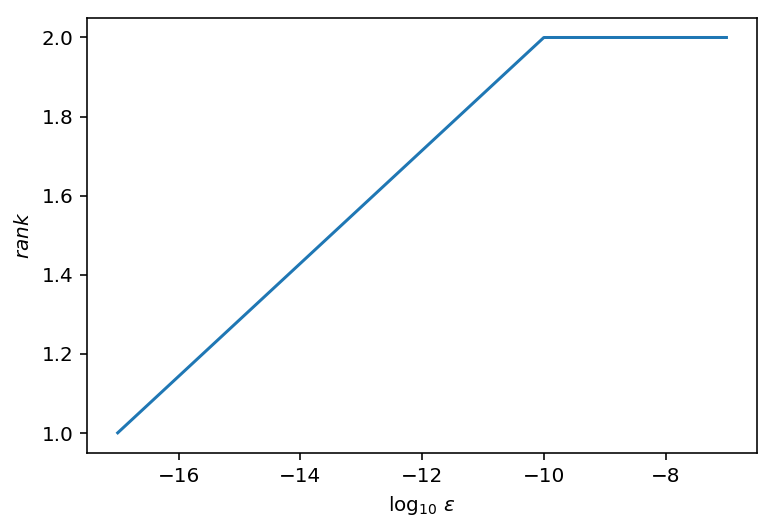

In [334]:
e=np.linspace(1e-17,1e-7,1000)

def plotrk(x):
    C = sp.matrix([[1,0],[1,x]])
    rk = rank(C)
    return rk
plotv = np.vectorize(plotrk)
rky = plotv(e)
lg = np.log10(e)
plt.plot(lg,rky)
plt.xlabel(r"$\log_{10} \ \epsilon$")
plt.ylabel(r"$rank$")
plt.show()

The graph above shows clearly that the result lost its precision at around
1e-10

Now plot $x=\mathbf{C}^{-1}v$ as a function of $log_{10}\epsilon$. So x would be a $2\times 1$ matrix, in order to plot its values as function of $log_{10}\epsilon$, we will have to plot in 3D. 

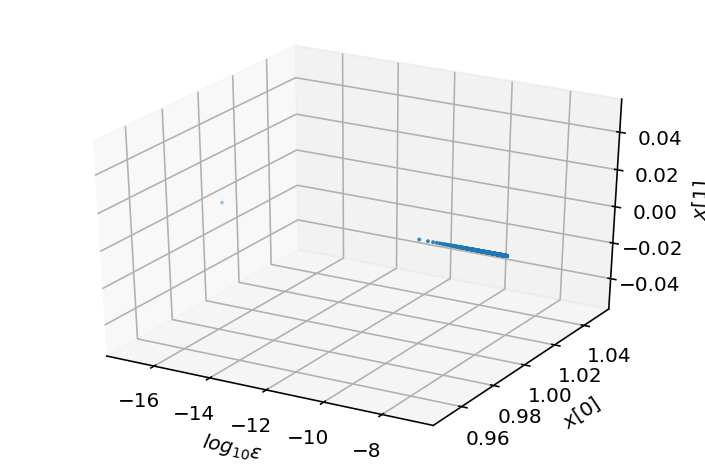

In [341]:

def plotx(x):
    C = sp.matrix([[1,0],[1,x]]).I
    v = sp.matrix([[1],[1]])
    xval = np.dot(C,v)
    return xval[0],xval[1]
pltx = np.vectorize(plotx)
y,z = pltx(e)
#print y,z

#plot the values of x as a function of log e
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lg, y, z,marker='.',s=4)
ax.set_xlabel(r"$log_{10}\epsilon$")
ax.set_ylabel(r"$x[0]$")
ax.set_zlabel(r"$x[1]$")
plt.show()


## Problem 3 -- Fundamental Plane

convert effective radii in arcsec to effective radii in Mpc.
$$R_e('') = \frac{Re(AU)}{D(pc)}$$
$$log_{10}R_e('')=log_{10}Re(AU)-log_{10}D(pc)$$
$$log_{10}Re(AU)=log_{10}D(pc)+log_{10}R_e('')$$
Table 3 provides $D(Mpc)$ and $log(R_e(''))$

In [146]:
%config InlineBackend.figure_format = 'retina'     
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#reading D and Re from table 3.
data = np.genfromtxt('table3.txt')
logRe = data[:,-1] #in arc second
D = data[:,-5]
#convert distance into log distance
logD = np.log10(D*1e6) 
#calculate Re in AU
logR = logD+logRe

#Now read log L and log sig_e from table 1
#Taking log L and log sig_e both from table 1 for consistency
dat = np.genfromtxt('table1.txt')
logL = dat[:,-1]
logsig = dat[:,1]
X = logL; Y =logR; Z = logsig
xx = X.mean(); yy = Y.mean(); zz = Z.mean()
print xx,yy,zz

9.9763875969 8.65735725051 2.10497286822


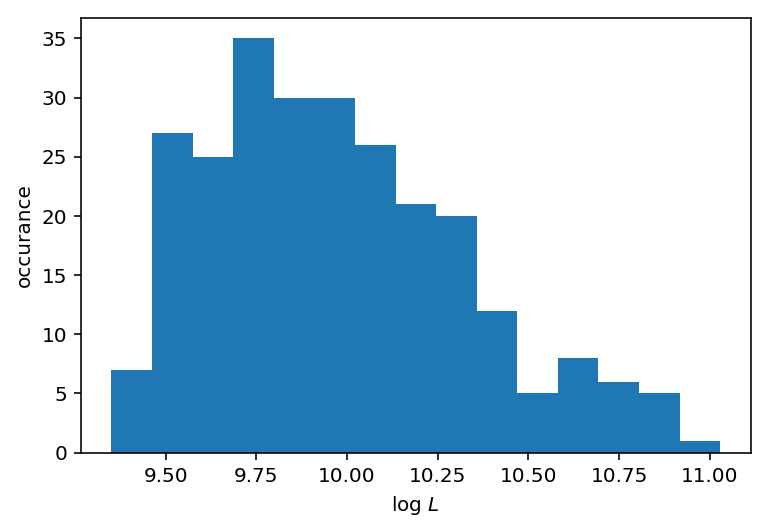

In [161]:
plt.hist(X, bins=15)
plt.xlabel(r"$\log \ L$")
plt.ylabel('occurance')
plt.show()

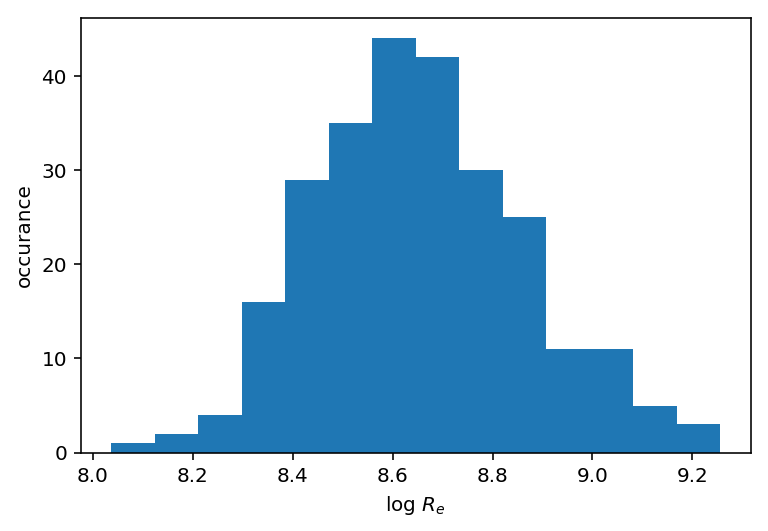

In [149]:
plt.hist(Y, bins=14)
plt.xlabel(r"$\log \ R_e$")
plt.ylabel('occurance')
plt.show()

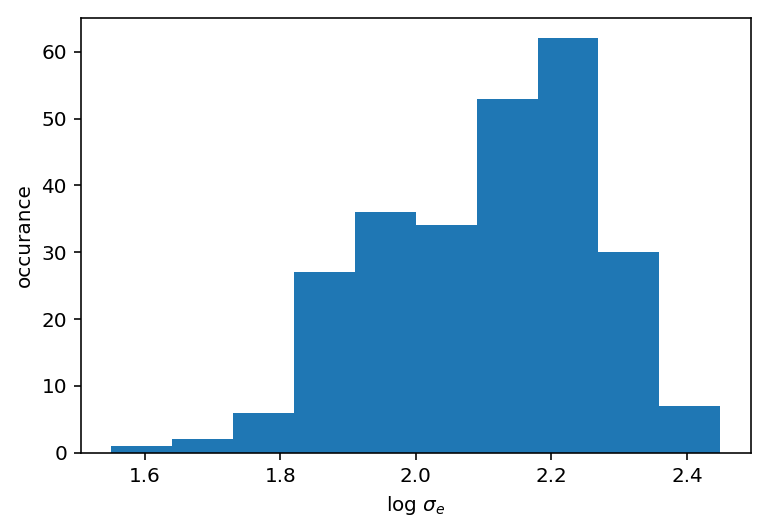

In [147]:
plt.hist(Z, bins=10)
plt.xlabel(r"$\log \ \sigma_e$")
plt.ylabel('occurance')
plt.show()

In [188]:
x_hist,x_bins = np.histogram(X,bins=15)
y_hist,y_bins = np.histogram(Y,bins=14)
z_hist,z_bins = np.histogram(Z,bins=10)
x_best = x_bins[x_hist.argmax()+1]
y_best = y_bins[y_hist.argmax()+1]
z_best = z_bins[z_hist.argmax()+1]
print "The best estimates for X Y and Z are:",x_best,y_best,z_best


The best estimates for X Y and Z are: 9.79773333333 8.64651414088 2.2694


The covariance matrix of three matrices is:
$$cov\mathbf{(X,Y,Z)}= 
 \begin{pmatrix}
 \sigma_{xx} & \sigma_{xy} & \sigma_{xz} \\
 \sigma_{yx} & \sigma_{yy} & \sigma_{yz} \\
 \sigma_{zx} & \sigma_{zy} & \sigma_{zz}
 \end{pmatrix}$$

In [220]:
cov_xy = np.cov(X,Y)
cov_yz = np.cov(Y,Z)
cov_zx = np.cov(Z,X)
sig_xx = cov_xy[0][0]
sig_yy = cov_xy[1][1]
sig_zz = cov_yz[1][1]
sig_xy = cov_xy[0][1]
sig_yz = cov_yz[0][1]
sig_zx = cov_zx[0][1]
cov_xyz = sp.matrix([[sig_xx,sig_xy,sig_zx],[sig_xy,sig_yy,sig_yz],[sig_zx,sig_yz,sig_zz]])
print "The covariance matrix is:",cov_xyz
#find the eigenvalue and eigenvectors of the matrix
eiv, eivec = np.linalg.eig(cov_xyz)
uu,vv,ww = np.linalg.svd(cov_xyz)
print "The eigenvalue of the matrix is:",eiv
print "The eigenvector of the matrix is:",eivec
print uu
print vv
print ww

The covariance matrix is: [[ 0.12462562  0.0572951   0.04292806]
 [ 0.0572951   0.0447898   0.01111104]
 [ 0.04292806  0.01111104  0.02636678]]
The eigenvalue of the matrix is: [ 0.16779249  0.00438102  0.02360869]
The eigenvector of the matrix is: [[ 0.85620041  0.49341854  0.15316331]
 [ 0.42531592 -0.50486034 -0.7511474 ]
 [ 0.29330397 -0.7082755   0.64212039]]
[[-0.85620041  0.15316331 -0.49341854]
 [-0.42531592 -0.7511474   0.50486034]
 [-0.29330397  0.64212039  0.7082755 ]]
[ 0.16779249  0.02360869  0.00438102]
[[-0.85620041 -0.42531592 -0.29330397]
 [ 0.15316331 -0.7511474   0.64212039]
 [-0.49341854  0.50486034  0.7082755 ]]


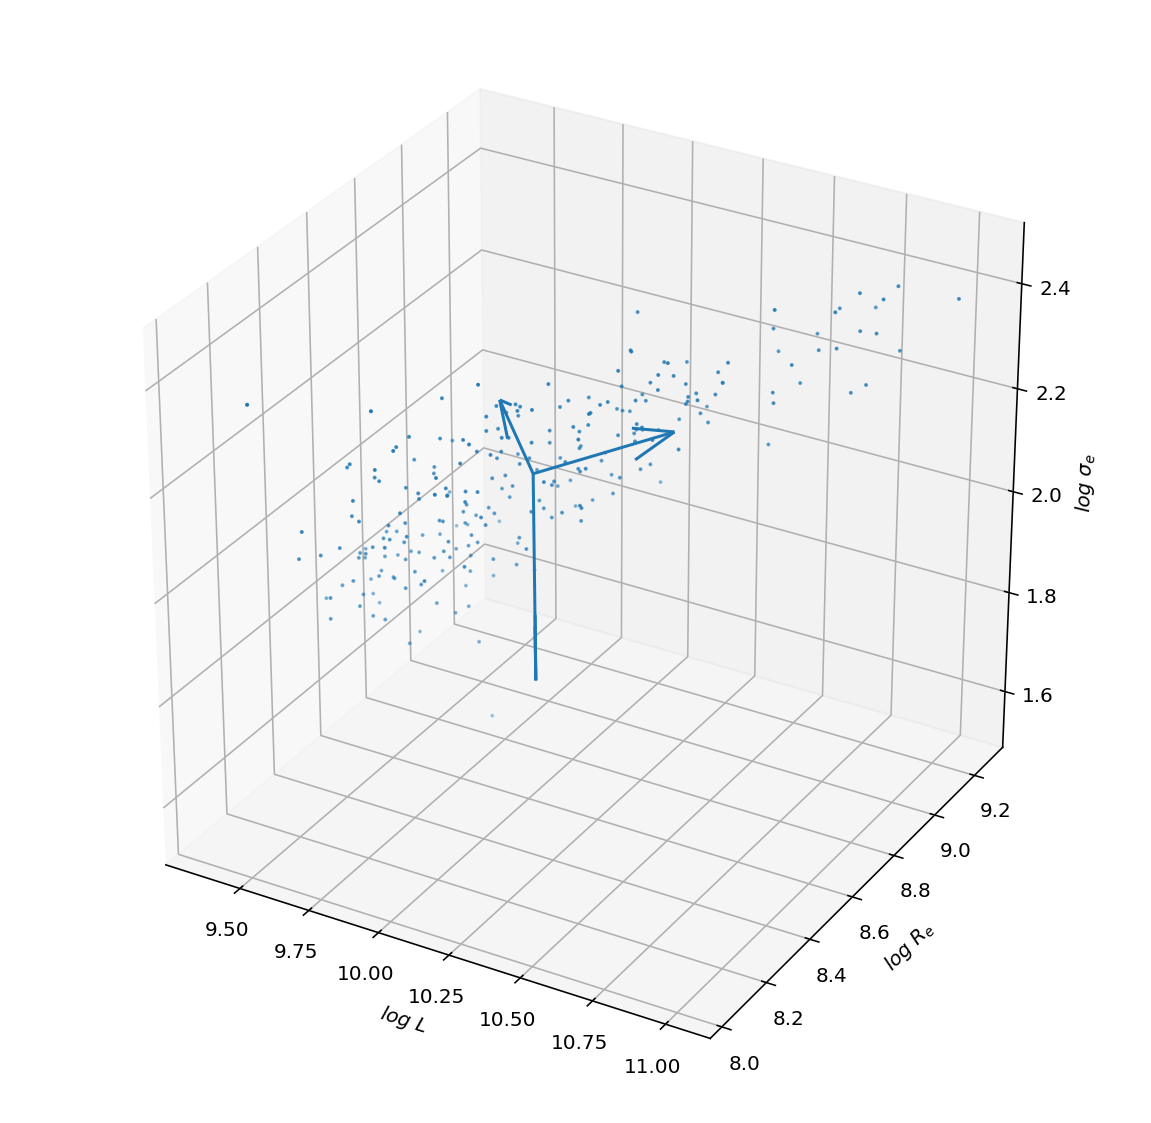

In [210]:
mulvec = np.array([[xx, yy, zz, 0.85620041,  0.49341854,  0.15316331], 
                [xx, yy, zz, 0.42531592, -0.50486034, -0.7511474],
                [xx, yy, zz, 0.29330397, -0.7082755,   0.64212039]])

i, j, k, l, m, n = zip(*mulvec)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z,marker='.',s=4)
ax.quiver(i, j, k, l, m, n, length=0.4)
ax.set_xlabel(r"$log \ L$")
ax.set_ylabel(r"$log \ R_e$")
ax.set_zlabel(r"$log \ \sigma_e$")
plt.show()

In [215]:
#Find the correlation using pearson correlation coefficient
from scipy.stats import pearsonr
print pearsonr(X, Y)
print pearsonr(Y, Z)
print pearsonr(X, Z)

(0.7668744693816627, 3.2013174948921619e-51)
(0.32332292846297023, 1.08748645053226e-07)
(0.74887443248242624, 1.2045425591476847e-47)


The covariance vectors and pearson coefficients show that X, Y, and Z are positively correlated.

### Visualize the covariance by the error ellipsoid 

[ 0.16779249  0.02360869  0.00438102] [ 1.22887445  0.46095363  0.1985678 ]


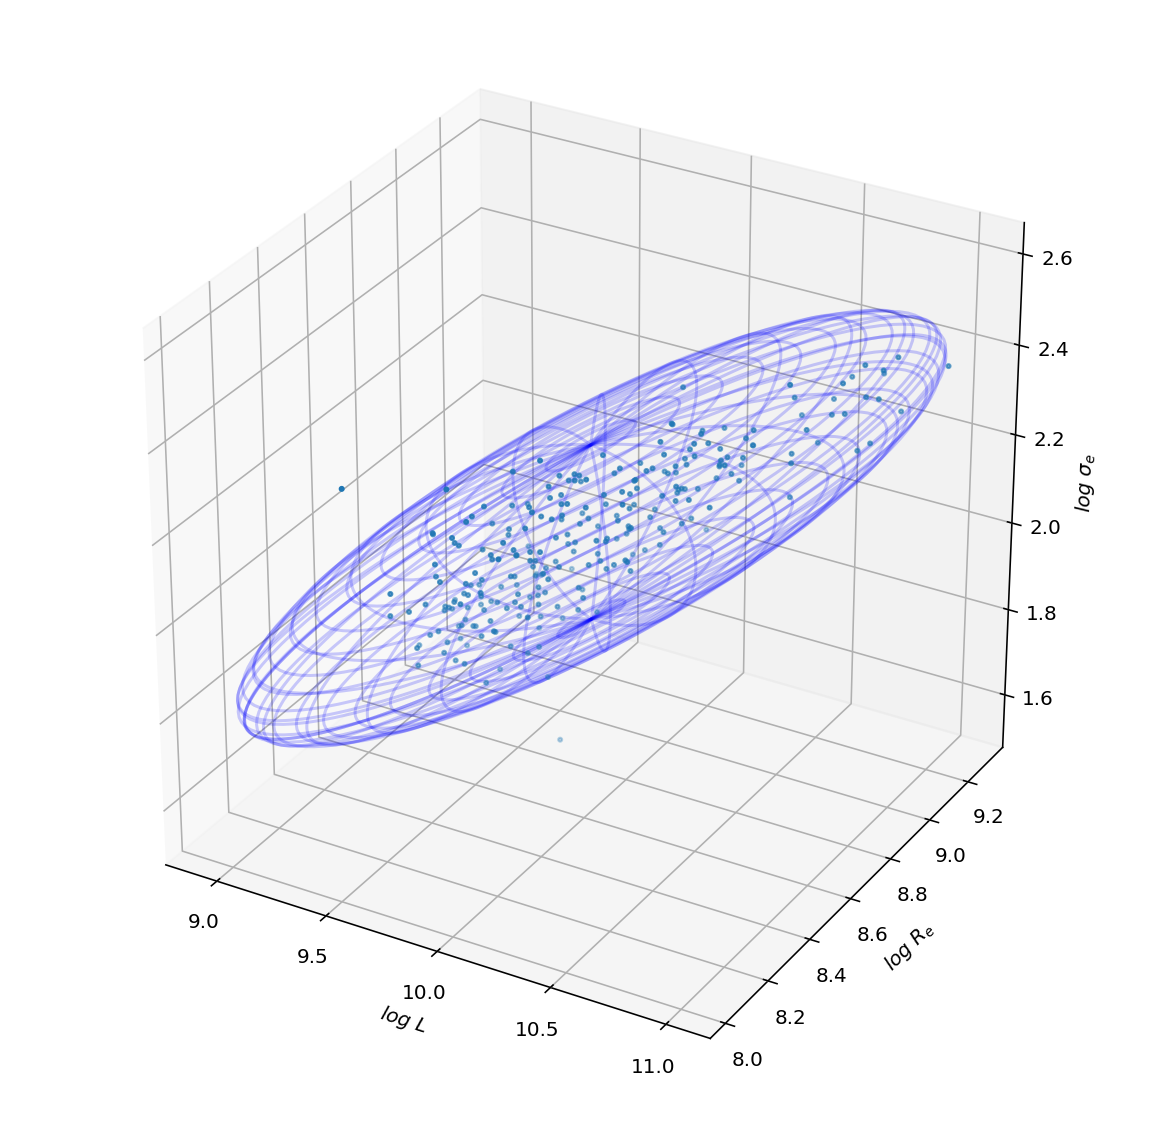

In [226]:
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#ellispsoid and center in matrix form
cov = np.array(cov_xyz)
center = [xx, yy, zz]

# find the rotation matrix and radii of the axes
U, s, rotation = linalg.svd(cov)
#3 sig feviation
radii = 3*np.sqrt(s)
print s,radii
# now carry on with EOL's answer
u = np.linspace(0.0, 2.0 * np.pi, 100)
v = np.linspace(0.0, np.pi, 100)
x = radii[0] * np.outer(np.cos(u), np.sin(v))
y = radii[1] * np.outer(np.sin(u), np.sin(v))
z = radii[2] * np.outer(np.ones_like(u), np.cos(v))
for i in range(len(x)):
    for j in range(len(x)):
        [x[i,j],y[i,j],z[i,j]] = np.dot([x[i,j],y[i,j],z[i,j]], rotation) + center
        

# plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z,marker='o',s=4)
ax.plot_wireframe(x, y, z,  rstride=4, cstride=4, color='b', alpha=0.2)
ax.set_xlabel(r"$log \ L$")
ax.set_ylabel(r"$log \ R_e$")
ax.set_zlabel(r"$log \ \sigma_e$")
plt.show()

